# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
#Type your code here
import numpy as np
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from scipy.stats import zscore

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
#Type your code here
from google.colab import drive
drive.mount('/content/drive')

# Memuat dataset dari Google Drive
file_path = "/content/drive/MyDrive/Road Traffic Accident Data – United Kingdom/jobs_dataset.csv"
df = pd.read_csv(file_path)

# Menampilkan 5 baris pertama
df.head()

Mounted at /content/drive


,company,rating,location,positionName,description,salary,url,jobType/0,jobType/1,jobType/2,jobType/3,searchInput/country,searchInput/position,externalApplyLink
0,Google,4.3,"San Bruno, CA","Senior Data Scientist, Research, YouTube Search",Note: By applying to this position you will ha...,"$166,000 - $244,000 a year",https://www.indeed.com/viewjob?jk=3129ec5dde24...,Full-time,NaN,NaN,NaN,US,Data Scientist,https://www.google.com/about/careers/applicati...
1,BAXTER,3.7,"Milwaukee, WI 53214",Senior AI Engineer - Data Scientist,This is where you save and sustain lives\n\nAt...,"$112,000 - $154,000 a year",https://www.indeed.com/viewjob?jk=19da1b85455c...,Full-time,NaN,NaN,NaN,US,Data Scientist,https://jobs.baxter.com/en/job/-/-/152/8298788...
2,Meta,4.2,"Redmond, WA","Audio Software Engineer, Applied Scientist","Redmond, WA • + 2 more•Full Time\nMessenger\nM...",$70.67 an hour,https://www.indeed.com/viewjob?jk=0b0b432e2a51...,Full-time,NaN,NaN,NaN,US,Data Scientist,https://www.metacareers.com/jobs/3101204833367...
3,Meta,4.2,"Bellevue, WA 98005","Software Engineer, Machine Learning","Bellevue, WA • Full Time\nMeta\nSoftware Engin...","$203,350 - $240,240 a year",https://www.indeed.com/viewjob?jk=08d2ef77c976...,Full-time,NaN,NaN,NaN,US,Data Scientist,https://www.metacareers.com/jobs/1096352489054...
4,Lockheed Martin,4.0,"Shelton, CT 06484",AI / Machine Learning Research Engineer (early...,"Job ID: 694362BR\nDate posted: May. 22, 2025\n...",NaN,https://www.indeed.com/viewjob?jk=e9aad7dcc34e...,Full-time,NaN,NaN,NaN,US,Data Scientist,https://click.appcast.io/t/V35efAz0-l7FWwo6IKe...


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [3]:
#Type your code here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   company               735 non-null    object 
 1   rating                735 non-null    float64
 2   location              735 non-null    object 
 3   positionName          735 non-null    object 
 4   description           735 non-null    object 
 5   salary                506 non-null    object 
 6   url                   735 non-null    object 
 7   jobType/0             501 non-null    object 
 8   jobType/1             19 non-null     object 
 9   jobType/2             1 non-null      object 
 10  jobType/3             1 non-null      object 
 11  searchInput/country   735 non-null    object 
 12  searchInput/position  735 non-null    object 
 13  externalApplyLink     553 non-null    object 
dtypes: float64(1), object(13)
memory usage: 80.5+ KB


In [4]:
df.describe(include='object')

,company,location,positionName,description,salary,url,jobType/0,jobType/1,jobType/2,jobType/3,searchInput/country,searchInput/position,externalApplyLink
count,735,735,735,735,506,735,501,19,1,1,735,735,553
unique,427,321,550,711,385,735,6,4,1,1,1,1,549
top,Amazon,"New York, NY",Data Scientist,Job Description:\n\nThis position requires off...,"$206,000 - $281,000 a year",https://www.indeed.com/viewjob?jk=e587a3d57c2e...,Full-time,Contract,Full-time,Contract,US,Data Scientist,https://apply.deloitte.com/en_US/careers/Invit...
freq,24,62,45,2,6,1,439,13,1,1,735,735,2


In [5]:
df.isna().sum()

,0
company,0
rating,0
location,0
positionName,0
description,0
salary,229
url,0
jobType/0,234
jobType/1,716
jobType/2,734


In [6]:
print(f"Jumlah baris duplikat: {df.duplicated().sum()}")


Jumlah baris duplikat: 0


In [7]:
df.dtypes


,0
company,object
rating,float64
location,object
positionName,object
description,object
salary,object
url,object
jobType/0,object
jobType/1,object
jobType/2,object


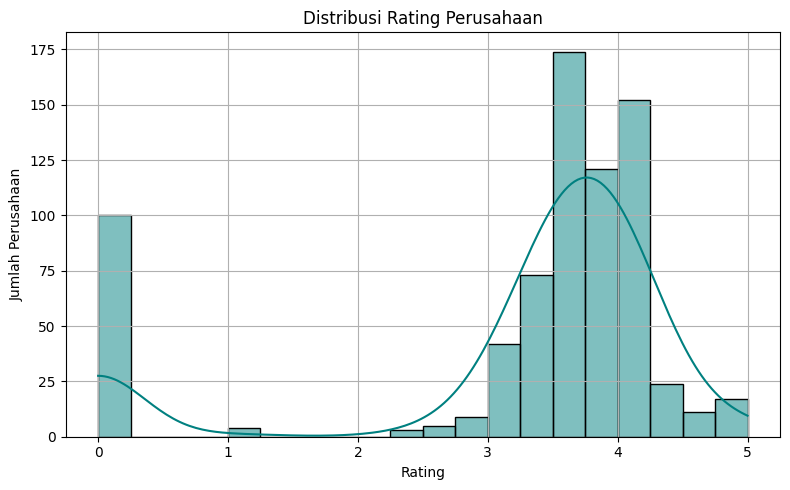

In [8]:
plt.figure(figsize=(8,5))
sns.histplot(df['rating'].dropna(), bins=20, kde=True, color='teal')
plt.title("Distribusi Rating Perusahaan")
plt.xlabel("Rating")
plt.ylabel("Jumlah Perusahaan")
plt.grid(True)
plt.tight_layout()
plt.show()

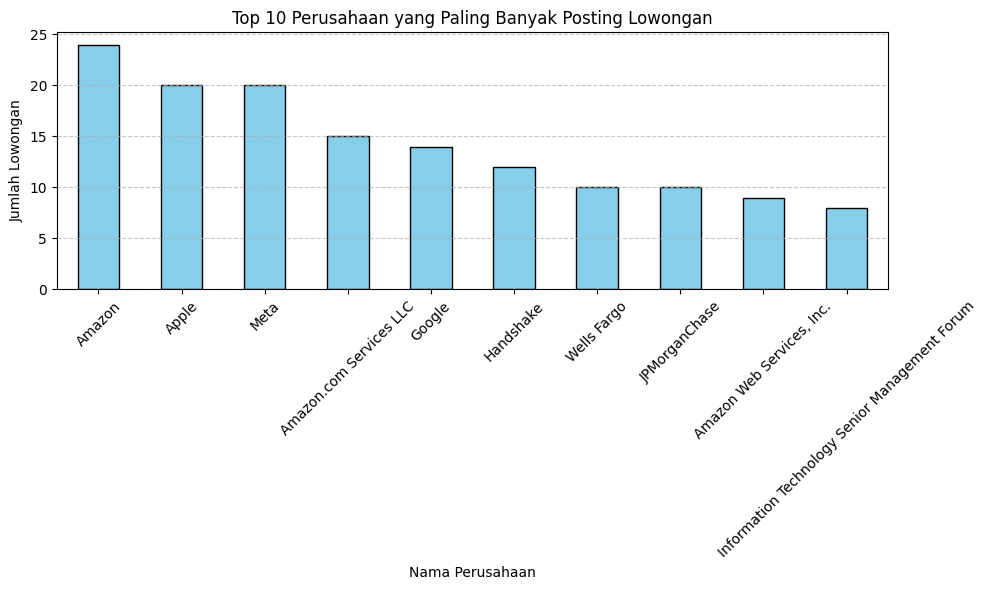

In [9]:
top_companies = df['company'].value_counts().head(10)

plt.figure(figsize=(10,6))
top_companies.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 10 Perusahaan yang Paling Banyak Posting Lowongan')
plt.xlabel('Nama Perusahaan')
plt.ylabel('Jumlah Lowongan')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

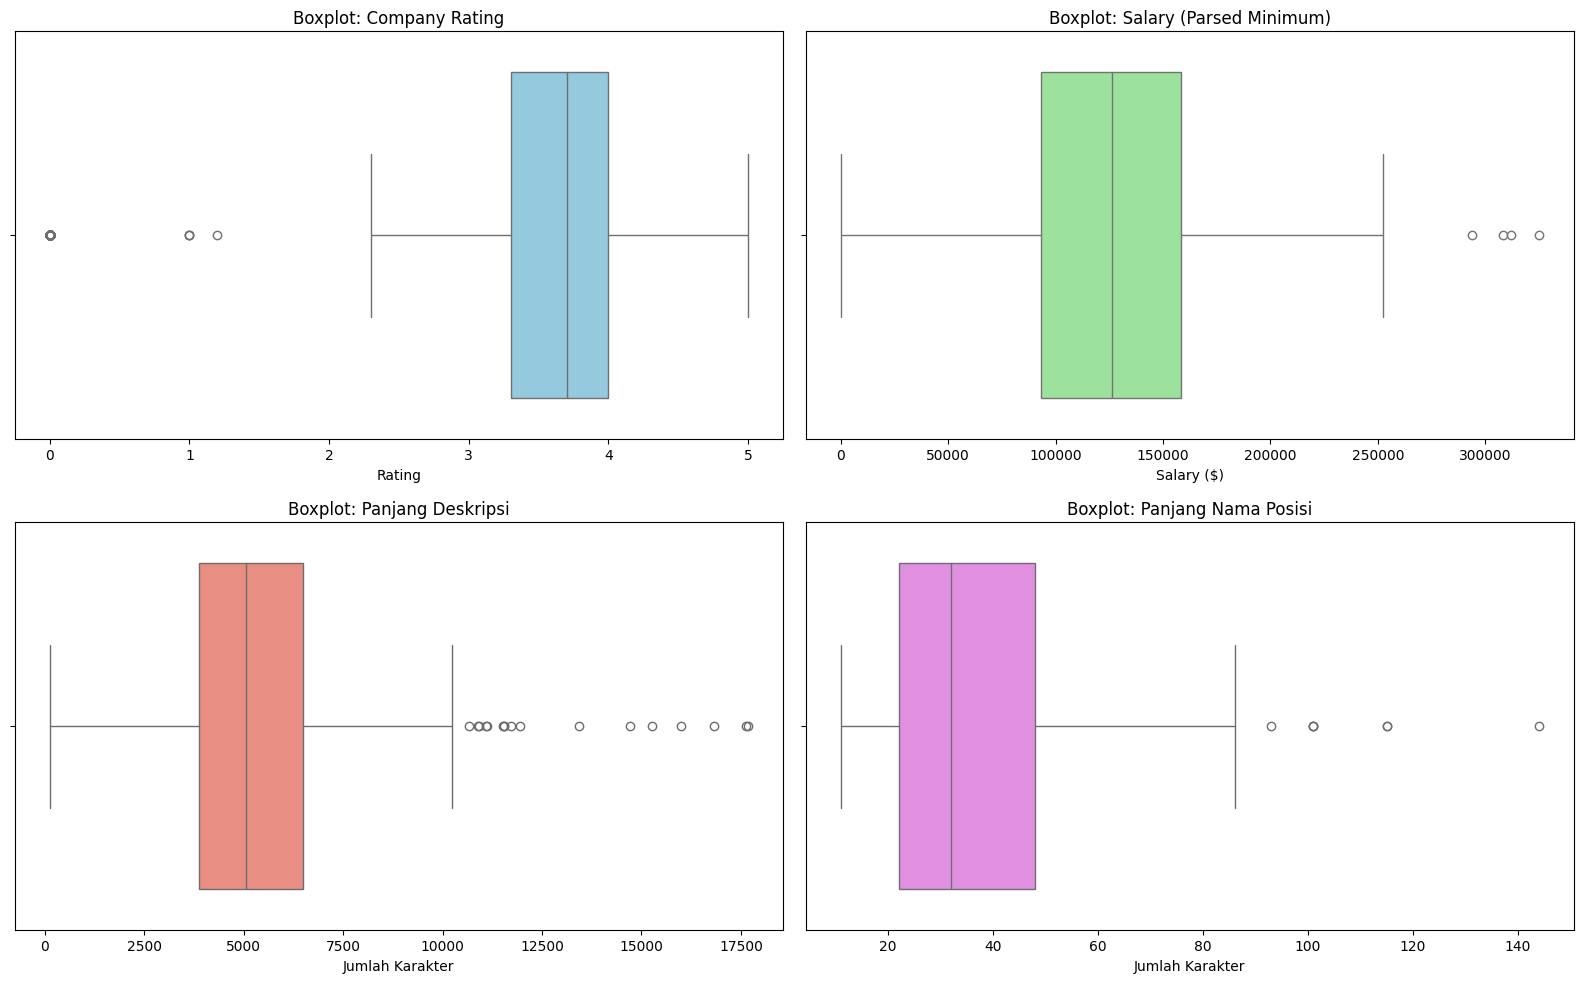

In [10]:
# --- Extract salary minimum as numeric ---
def extract_salary(s):
    try:
        numbers = re.findall(r'[\d,]+', str(s))
        if len(numbers) >= 1:
            return int(numbers[0].replace(',', ''))
    except:
        return None
    return None

df['salary_num'] = df['salary'].apply(extract_salary)

# --- Calculate text lengths ---
df['desc_len'] = df['description'].astype(str).apply(len)
df['posname_len'] = df['positionName'].astype(str).apply(len)

# --- Create subplots ---
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
sns.set(style="whitegrid")

# Boxplot 1: Rating
sns.boxplot(x=df['rating'], ax=axes[0, 0], color="skyblue")
axes[0, 0].set_title('Boxplot: Company Rating')
axes[0, 0].set_xlabel('Rating')

# Boxplot 2: Salary (numeric)
sns.boxplot(x=df['salary_num'], ax=axes[0, 1], color="lightgreen")
axes[0, 1].set_title('Boxplot: Salary (Parsed Minimum)')
axes[0, 1].set_xlabel('Salary ($)')

# Boxplot 3: Description Length
sns.boxplot(x=df['desc_len'], ax=axes[1, 0], color="salmon")
axes[1, 0].set_title('Boxplot: Panjang Deskripsi')
axes[1, 0].set_xlabel('Jumlah Karakter')

# Boxplot 4: Position Name Length
sns.boxplot(x=df['posname_len'], ax=axes[1, 1], color="violet")
axes[1, 1].set_title('Boxplot: Panjang Nama Posisi')
axes[1, 1].set_xlabel('Jumlah Karakter')

# Layout rapih
plt.tight_layout()
plt.show()


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

##mising value


In [11]:
df = df.dropna(subset=['salary'])


In [12]:
job_cols = ['jobType/0', 'jobType/1', 'jobType/2', 'jobType/3']
df[job_cols] = df[job_cols].fillna(False)


/tmp/ipython-input-12-1025220974.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[job_cols] = df[job_cols].fillna(False)


In [13]:
df[job_cols] = df[job_cols].fillna('Unknown')


/tmp/ipython-input-13-180887027.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[job_cols] = df[job_cols].fillna('Unknown')


In [14]:
df['externalApplyLink'] = df['externalApplyLink'].fillna('Unavailable')


/tmp/ipython-input-14-443648195.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['externalApplyLink'] = df['externalApplyLink'].fillna('Unavailable')


In [15]:
print("Missing values tersisa:\n", df.isna().sum())


Missing values tersisa:
 company                 0
rating                  0
location                0
positionName            0
description             0
salary                  0
url                     0
jobType/0               0
jobType/1               0
jobType/2               0
jobType/3               0
searchInput/country     0
searchInput/position    0
externalApplyLink       0
salary_num              0
desc_len                0
posname_len             0
dtype: int64


##duplikat


In [16]:
df = df.drop_duplicates(subset=['company', 'positionName', 'location', 'salary', 'description'])
df['is_dup_logical'] = df.duplicated(subset=['company', 'positionName', 'location'], keep=False)
df[df['is_dup_logical'] == True]


,company,rating,location,positionName,description,salary,url,jobType/0,jobType/1,jobType/2,jobType/3,searchInput/country,searchInput/position,externalApplyLink,salary_num,desc_len,posname_len,is_dup_logical
3,Meta,4.2,"Bellevue, WA 98005","Software Engineer, Machine Learning","Bellevue, WA • Full Time\nMeta\nSoftware Engin...","$203,350 - $240,240 a year",https://www.indeed.com/viewjob?jk=08d2ef77c976...,Full-time,False,False,False,US,Data Scientist,https://www.metacareers.com/jobs/1096352489054...,203350.0,5064,35,True
67,NVIDIA,4.2,"Santa Clara, CA 95050",Senior AI Workflow Engineer,"Today, NVIDIA is tapping into the unlimited po...","$184,000 - $356,500 a year",https://www.indeed.com/viewjob?jk=e0b5c8d21888...,Full-time,False,False,False,US,Data Scientist,https://click.appcast.io/t/Gd_9WodhnRCXfXvo7zA...,184000.0,5230,27,True
267,Base-2 Solutions,3.3,"Bethesda, MD",Data Scientist,"Required Security Clearance:\nTop Secret/SCI, ...","$140,792.99 - $187,723.99 a year",https://www.indeed.com/viewjob?jk=1993a32e587f...,Full-time,False,False,False,US,Data Scientist,https://phh.tbe.taleo.net/phh01/ats/careers/v2...,140792.0,5905,14,True
274,Base-2 Solutions,3.3,"Bethesda, MD",Data Scientist,"Required Security Clearance:\nTop Secret/SCI, ...","$174,778.09 - $233,037.46 a year",https://www.indeed.com/viewjob?jk=7bad9478a5c7...,Full-time,False,False,False,US,Data Scientist,https://phh.tbe.taleo.net/phh01/ats/careers/v2...,174778.0,6063,14,True
394,Meta,4.0,"Bellevue, WA 98005","Software Engineer, Machine Learning",Meta is seeking talented engineers to join our...,$56.25 an hour,https://www.indeed.com/viewjob?jk=bfe6bb4317f8...,False,False,False,False,US,Data Scientist,https://www.metacareers.com/jobs/1368969190886...,56.0,5014,35,True
418,NVIDIA,4.2,"Santa Clara, CA 95050",Senior AI Workflow Engineer,"Today, NVIDIA is tapping into the unlimited po...","$224,000 - $356,500 a year",https://www.indeed.com/viewjob?jk=e69555eea405...,Full-time,False,False,False,US,Data Scientist,https://click.appcast.io/t/4PdPpK0NLh2E4npaqEZ...,224000.0,5232,27,True
436,JPMorganChase,3.9,"Jersey City, NJ 07310",Data Scientist,JOB DESCRIPTION\n\nDESCRIPTION:\n\nDuties: Col...,"$165,400 - $195,000 a year",https://www.indeed.com/viewjob?jk=835e3076c61b...,Full-time,False,False,False,US,Data Scientist,https://jpmc.fa.oraclecloud.com/hcmUI/Candidat...,165400.0,5967,14,True
441,JPMorganChase,3.9,"Jersey City, NJ 07310",Data Scientist,DESCRIPTION:\n\nDuties: Collaborate with the b...,"$165,400 - $195,000 a year",https://www.indeed.com/viewjob?jk=d9d056663328...,Full-time,False,False,False,US,Data Scientist,https://jpmc.fa.oraclecloud.com/hcmUI/Candidat...,165400.0,3531,14,True
447,JPMorganChase,3.9,"Jersey City, NJ 07310",Data Scientist,DESCRIPTION:\n\nDuties: Responsible for develo...,"$170,000 - $210,000 a year",https://www.indeed.com/viewjob?jk=f74c6823dc19...,Full-time,False,False,False,US,Data Scientist,https://jpmc.fa.oraclecloud.com/hcmUI/Candidat...,170000.0,3460,14,True
607,Apple,4.1,"Cupertino, CA",Machine Learning Engineer,"Imagine what you could do here. At Apple, grea...","$175,800 - $264,200 a year",https://www.indeed.com/viewjob?jk=b9d80c3af0da...,False,False,False,False,US,Data Scientist,https://jobs.apple.com/en-us/details/200606214...,175800.0,4473,25,True


##Normalisasi atau Standarisasi Fitur

In [17]:
#  kolom numerik yang akan di-normalisasi
cols_to_scale = ['rating', 'salary_num', 'desc_len', 'posname_len']


df_scaled = df.copy()

scaler = StandardScaler()
df_scaled[cols_to_scale] = scaler.fit_transform(df_scaled[cols_to_scale])

##penanganan outlier

In [18]:
# Hitung z-score
z_scores = df_scaled[['rating', 'salary_num', 'desc_len', 'posname_len']].apply(zscore)

# Cek data yang punya z-score > 3 atau < -3 di salah satu kolom
outliers = (z_scores.abs() > 3).any(axis=1)

# Tampilkan jumlah & baris outlier
print("Jumlah outlier (z-score > 3):", outliers.sum())
df_outliers = df_scaled[outliers]
display(df_outliers)

Jumlah outlier (z-score > 3): 15


,company,rating,location,positionName,description,salary,url,jobType/0,jobType/1,jobType/2,jobType/3,searchInput/country,searchInput/position,externalApplyLink,salary_num,desc_len,posname_len,is_dup_logical
40,Walmart,0.131131,"Bentonville, AR 72716","(USA) Senior Manager, Data Science",Position Summary...\n\nWhat you'll do...\nMode...,"$110,000 - $220,000 a year",https://www.indeed.com/viewjob?jk=04d57cffef51...,False,False,False,False,US,Data Scientist,https://click.appcast.io/t/xBge4aRp3rwOozjmfb8...,-0.189942,3.856786,-0.201411,False
151,Instacart,-0.088579,Remote,"Principal Machine Learning Engineer, Ads Quality",We're transforming the grocery industry\n\nAt ...,"$308,000 - $372,000 a year",https://www.indeed.com/viewjob?jk=c9e41ef30f15...,False,False,False,False,US,Data Scientist,https://instacart.careers/job/?gh_jid=6967732,3.142440,0.422063,0.547169,False
325,Information Technology Senior Management Forum,-2.358911,"McLean, VA",Senior Data Scientist - NLP,Posted Date\n6/24/2025\nDescription\nSenior Da...,"$133,000 - $165,600 a year",https://www.indeed.com/viewjob?jk=a6dbd374c294...,Full-time,False,False,False,US,Data Scientist,https://jobs.itsmfleaders.org/job/dnf6t8/senio...,0.197153,4.746770,-0.575701,False
337,Blue River Technology,0.204368,Remote,Principal Machine Learning Tech Lead,"We're Blue River, a team of innovators driven ...","Up to $312,000 a year",https://www.indeed.com/viewjob?jk=88210ffb7850...,False,False,False,False,US,Data Scientist,Unavailable,3.209761,0.555709,-0.094471,False
347,Information Technology Senior Management Forum,-2.358911,"New York, NY",Senior Machine Learning Engineer,Posted Date\n6/24/2025\nDescription\nSenior Ma...,"$158,600 - $197,400 a year",https://www.indeed.com/viewjob?jk=6bba51a92ccb...,Full-time,False,False,False,US,Data Scientist,https://jobs.itsmfleaders.org/job/d7f8kk/senio...,0.628006,3.315882,-0.308351,False
398,"Amazon Web Services, Inc.",0.131131,"Atlanta, GA",Senior Delivery Consultant - Senior Machine Le...,- 5+ years cloud architecture and implementati...,"$138,200 - $239,000 a year",https://www.indeed.com/viewjob?jk=0d962f67cb48...,Full-time,False,False,False,US,Data Scientist,https://www.amazon.jobs/en/jobs/3017067/senior...,0.284670,1.283801,4.129659,False
405,"Amazon Web Services, Inc.",0.131131,"Boston, MA",Delivery Consultant - Machine Learning Enginee...,- 3+ years cloud architecture and implementati...,"$118,200 - $204,300 a year",https://www.indeed.com/viewjob?jk=527c90774433...,Full-time,False,False,False,US,Data Scientist,https://www.amazon.jobs/en/jobs/3017077/delive...,-0.051935,1.161539,3.381079,False
491,Amazon,0.204368,"Atlanta, GA",Senior Delivery Consultant - Senior Machine Le...,DESCRIPTION\n\nAre you excited about building ...,"$138,200 - $239,000 a year",https://www.indeed.com/viewjob?jk=e395aeec91b0...,False,False,False,False,US,Data Scientist,https://www.amazon.jobs/en/jobs/3017067/senior...,0.284670,1.309096,4.129659,False
492,Amazon,0.204368,"Boston, MA",Delivery Consultant - Machine Learning Enginee...,DESCRIPTION\n\nAre you excited about building ...,"$118,200 - $204,300 a year",https://www.indeed.com/viewjob?jk=9078a7d2c0aa...,False,False,False,False,US,Data Scientist,https://www.amazon.jobs/en/jobs/3017077/delive...,-0.051935,1.187256,3.381079,False
575,Information Technology Senior Management Forum,-2.358911,"McLean, VA","Principal Associate, Data Science - Model Risk...",Posted Date\n6/23/2025\nDescription\nPrincipal...,"$158,600 - $181,000 a year",https://www.indeed.com/viewjob?jk=3cc2b4091727...,Full-time,False,False,False,US,Data Scientist,https://jobs.itsmfleaders.org/job/yq3m46/princ...,0.628006,4.396004,0.814519,False


In [25]:
df_winsor3 = df_scaled.copy()

for col in ['salary_num', 'desc_len', 'posname_len']:
    Q1 = df_scaled[col].quantile(0.25)
    Q3 = df_scaled[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df_winsor3[col] = df_scaled[col].clip(lower, upper)


##Encoding Data Kategorikal

In [28]:
cols_to_encode = [
    'company',
    'location',
    'positionName',
    'jobType/0',
    'jobType/1',
    'jobType/2',
    'jobType/3',
    'searchInput/country',
    'searchInput/position'
]
# Salin dataframe agar data asli tetap aman
df_encoded = df_winsor3.copy()

# One-Hot Encoding
df_encoded = pd.get_dummies(df_encoded, columns=cols_to_encode, drop_first=True)

print("One-hot encoding selesai.")
print("Jumlah kolom  encoding:", df_encoded.shape[1])


One-hot encoding selesai.
Jumlah kolom  encoding: 908


##binning

In [29]:
# Binning salary
bins_salary = [0, 70000, 120000, 200000, df['salary_num'].max()]
labels_salary = ['Low', 'Medium', 'High', 'Very High']
df['salary_bin'] = pd.cut(df['salary_num'], bins=bins_salary, labels=labels_salary)


In [30]:
# Binning rating
bins_rating = [0, 2, 3.5, 4.5, 5]
labels_rating = ['Poor', 'Average', 'Good', 'Excellent']
df['rating_bin'] = pd.cut(df['rating'], bins=bins_rating, labels=labels_rating)
